In [9]:
import numpy as np

# Given constants
s1 = 0.030  # in meters

phi_deg = 23.0  # in degrees
phi = np.deg2rad(phi_deg)
g = 9.80  # m/s^2

# Experimental data (time in milliseconds)
# Format: Each row is "Trial & t1 & t2 & t3 & [extra columns]..."
data = """
1 & 60  & 51  & 469 & 464.5 & 0.410 \\ \hline
2 & 69  & 56  & 539 & 532.5 & 0.410 \\ \hline
3 & 50  & 46  & 422 & 420.0 & 0.410 \\ \hline
4 & 73  & 55  & 543 & 534.0 & 0.410 \\ \hline
5 & 64  & 55  & 542 & 537.5 & 0.410 \\ \hline
6 & 69  & 51  & 530 & 521.0 & 0.410 \\ \hline
7 & 55  & 50  & 487 & 484.5 & 0.410 \\ \hline
8 & 56  & 46  & 424 & 419.0 & 0.410 \\ \hline
"""

# Split the input into lines and extract the data columns
lines = data.strip().splitlines()
t1_ms, t2_ms, t3_ms = [], [], []
for line in lines:
    # Remove the trailing "\hline" if present
    line = line.replace("\\hline", "")
    # Split the line using '&'
    parts = line.split('&')
    # According to the note: 第一列为t1，第二列为t2，第三列为t3
    # Here, parts[0] is trial number, so we take parts[1], parts[2] and parts[3]
    t1_ms.append(float(parts[1].strip()))
    t2_ms.append(float(parts[2].strip()))
    t3_ms.append(float(parts[3].strip()))
    
t1_ms = np.array(t1_ms)
t2_ms = np.array(t2_ms)
t3_ms = np.array(t3_ms)

# Convert milliseconds to seconds
t1 = t1_ms / 1000.0
t2 = t2_ms / 1000.0
t3 = t3_ms / 1000.0

# Compute t4 according to the provided relation
t4 = t3 + 0.5 * (t2 - t1)

# Compute friction coefficient for each experiment
fd = np.tan(phi) - (s1 * (t1 - t2)) / (g * t1 * t2 * t4 * np.cos(phi))

print("Calculated friction coefficients for each trial:", t4)
print("Calculated friction coefficients for each trial:", fd)
print("Average friction coefficient:", np.mean(fd))

print("Trial & t1 (ms) & t2 (ms) & t3 (ms) & t4 (ms) & fd \\\\ \\hline")
for i in range(len(t1_ms)):
    t4_ms = t4[i] * 1000  # convert t4 from seconds to milliseconds
    print(f"{i+1} & {t1_ms[i]:.0f} & {t2_ms[i]:.0f} & {t3_ms[i]:.0f} & {t4_ms:.1f} & {fd[i]:.3f} \\\\ \\hline")

Calculated friction coefficients for each trial: [0.4645 0.5325 0.42   0.534  0.5375 0.521  0.4845 0.419 ]
Calculated friction coefficients for each trial: [0.40341743 0.40346338 0.41070424 0.39655486 0.4086554  0.39182471
 0.41199487 0.39366357]
Average friction coefficient: 0.4025348082750994
Trial & t1 (ms) & t2 (ms) & t3 (ms) & t4 (ms) & fd \\ \hline
1 & 60 & 51 & 469 & 464.5 & 0.403 \\ \hline
2 & 69 & 56 & 539 & 532.5 & 0.403 \\ \hline
3 & 50 & 46 & 422 & 420.0 & 0.411 \\ \hline
4 & 73 & 55 & 543 & 534.0 & 0.397 \\ \hline
5 & 64 & 55 & 542 & 537.5 & 0.409 \\ \hline
6 & 69 & 51 & 530 & 521.0 & 0.392 \\ \hline
7 & 55 & 50 & 487 & 484.5 & 0.412 \\ \hline
8 & 56 & 46 & 424 & 419.0 & 0.394 \\ \hline


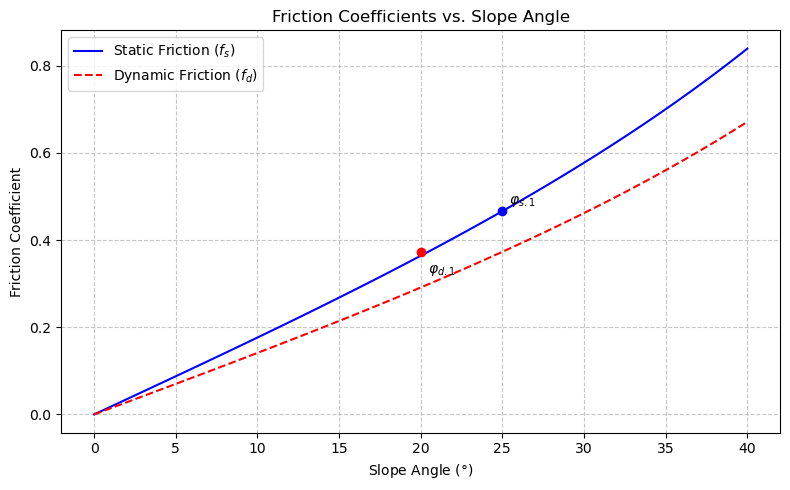

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据
angles = np.linspace(0, 40, 100)  # 角度范围0°-40°
static_friction = np.tan(np.radians(angles))  # 静摩擦系数 f_s = tan(φ)
dynamic_friction = 0.8 * static_friction     # 假设动摩擦系数为静摩擦的80%

# 标注的实验点（示例值）
phi_s1 = 25  # 静摩擦角示例值
phi_d1 = 20  # 动摩擦角示例值
f_s1 = np.tan(np.radians(phi_s1))
f_d1 = 0.8 * f_s1

# 创建图形
plt.figure(figsize=(8, 5))

# 绘制曲线
plt.plot(angles, static_friction, label='Static Friction ($f_s$)', color='blue')
plt.plot(angles, dynamic_friction, label='Dynamic Friction ($f_d$)', color='red', linestyle='--')

# 标注关键点
plt.scatter(phi_s1, f_s1, color='blue', zorder=5)
plt.annotate(r'$\varphi_{s.1}$', (phi_s1, f_s1), textcoords="offset points", xytext=(5,5), ha='left')

plt.scatter(phi_d1, f_d1, color='red', zorder=5)
plt.annotate(r'$\varphi_{d.1}$', (phi_d1, f_d1), textcoords="offset points", xytext=(5,-15), ha='left')

# 添加标签和标题
plt.xlabel('Slope Angle ($\degree$)')
plt.ylabel('Friction Coefficient')
plt.title('Friction Coefficients vs. Slope Angle')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

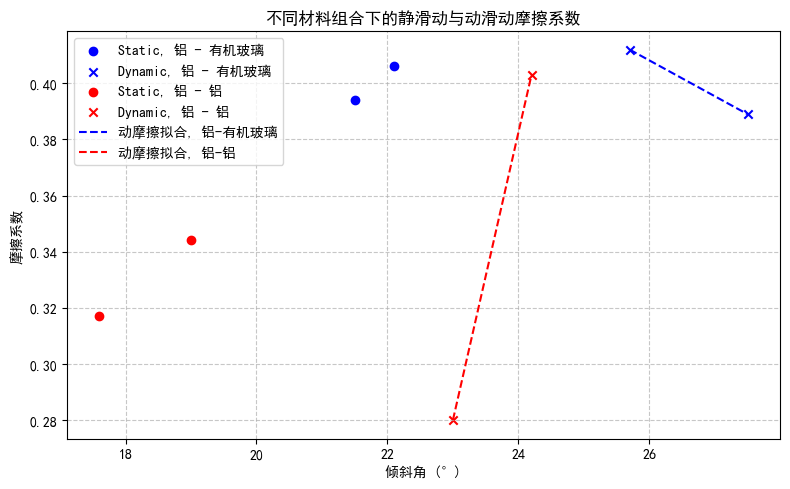

In [6]:
import numpy as np

import matplotlib.pyplot as plt


# 设置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Define table data
materials = np.array(["铝 - 有机玻璃", "铝 - 有机玻璃", "铝 - 铝", "铝 - 铝"])
tilt_angles_static = np.array([21.5, 22.1, 17.6, 19.0])  # Tilt angles in degrees
static_friction = np.array([0.3939, 0.4061, 0.3172, 0.3443])
tilt_angles_dynamic = np.array([25.7, 27.5, 23, 24.2])  # Tilt angles in degrees
dynamic_friction = np.array([0.412, 0.389, 0.28, 0.403])

# Create masks for different material combinations
mask_glass = materials == "铝 - 有机玻璃"
mask_aluminum = materials == "铝 - 铝"

plt.figure(figsize=(8, 5))

# Plot for 铝 - 有机玻璃
plt.scatter(tilt_angles_static[mask_glass], static_friction[mask_glass], 
            color='blue', marker='o', label='Static, 铝 - 有机玻璃')
plt.scatter(tilt_angles_dynamic[mask_glass], dynamic_friction[mask_glass], 
            color='blue', marker='x', label='Dynamic, 铝 - 有机玻璃')

# Plot for 铝 - 铝
plt.scatter(tilt_angles_static[mask_aluminum], static_friction[mask_aluminum], 
            color='red', marker='o', label='Static, 铝 - 铝')
plt.scatter(tilt_angles_dynamic[mask_aluminum], dynamic_friction[mask_aluminum], 
            color='red', marker='x', label='Dynamic, 铝 - 铝')
# 拟合并绘制动摩擦拟合线（铝-有机玻璃）
fit_glass = np.polyfit(tilt_angles_dynamic[mask_glass], dynamic_friction[mask_glass], 1)
x_glass = np.linspace(min(tilt_angles_dynamic[mask_glass]), max(tilt_angles_dynamic[mask_glass]), 100)
y_glass = np.polyval(fit_glass, x_glass)
plt.plot(x_glass, y_glass, color='blue', linestyle='--', label='动摩擦拟合, 铝-有机玻璃')

# 拟合并绘制动摩擦拟合线（铝-铝）
fit_al = np.polyfit(tilt_angles_dynamic[mask_aluminum], dynamic_friction[mask_aluminum], 1)
x_al = np.linspace(min(tilt_angles_dynamic[mask_aluminum]), max(tilt_angles_dynamic[mask_aluminum]), 100)
y_al = np.polyval(fit_al, x_al)
plt.plot(x_al, y_al, color='red', linestyle='--', label='动摩擦拟合, 铝-铝')


plt.xlabel('倾斜角 (°)')
plt.ylabel('摩擦系数')
plt.title('不同材料组合下的静滑动与动滑动摩擦系数')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()